In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("patents_cleaned.csv")
df.head()

,Unnamed: 0,patent_number,patent_title,patent_kind,patent_type,patent_year,patent_date,patent_abstract,patent_firstnamed_assignee_city,patent_firstnamed_assignee_country,...,patent_firstnamed_inventor_state,patent_num_cited_by_us_patents,patent_num_combined_citations,patent_num_foreign_citations,patent_num_us_application_citations,patent_num_us_patent_citations,patent_num_claims,detail_desc_length,patent_processing_time,patent_average_processing_time
0,0,10001775,Machine learning systems and techniques to opt...,B2,utility,2018,2018-06-19,"A system, an apparatus or a process may be con...",Foster City,US,...,CA,0,128,8,102,18,21,149708.0,538,871.0
1,1,10004112,Machine learning apparatus and coil electric h...,B2,utility,2018,2018-06-19,A machine learning apparatus includes a state ...,Yamanashi,JP,...,Foreigner,1,15,10,2,3,6,30232.0,628,867.0
2,2,10013404,Targeted story summarization using natural lan...,B2,utility,2018,2018-07-03,A computer system may receive a textual work. ...,Armonk,US,...,MN,2,30,0,18,12,19,62615.0,943,1034.0
3,3,10015181,Using natural language processing for detectio...,B2,utility,2018,2018-07-03,"Detection of unintended application behaviors,...",Armonk,US,...,NY,0,10,0,7,3,14,20517.0,775,988.0
4,4,10019491,Machine learning of response selection to stru...,B1,utility,2018,2018-07-10,A machine learning of response selection to st...,Austin,US,...,TX,6,4,0,2,2,30,33379.0,145,894.0


In [3]:
df['target'] = df['patent_kind'].apply(lambda x: 1 if x == 'B2' else 0)

X = df[['patent_num_claims', 'detail_desc_length', 'patent_processing_time', 'patent_num_us_application_citations', 'patent_firstnamed_assignee_longitude', 'patent_year']]
y = df['target']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=95)
X_train_dt.head(), X_test_dt.head(), y_train_dt.head(), y_test_dt.head()

(      patent_num_claims  detail_desc_length  patent_processing_time  \
 4733                 25             96878.0                    1180   
 3358                 20             28159.0                     901   
 4835                 35             43671.0                     469   
 593                  20             23470.0                     890   
 215                  20             97475.0                     281   
 
       patent_num_us_application_citations  \
 4733                                    2   
 3358                                    3   
 4835                                   11   
 593                                    11   
 215                                     4   
 
       patent_firstnamed_assignee_longitude  patent_year  
 4733                             -88.00790         2023  
 3358                               5.47863         2022  
 4835                             -73.09320         2023  
 593                               10.38460         

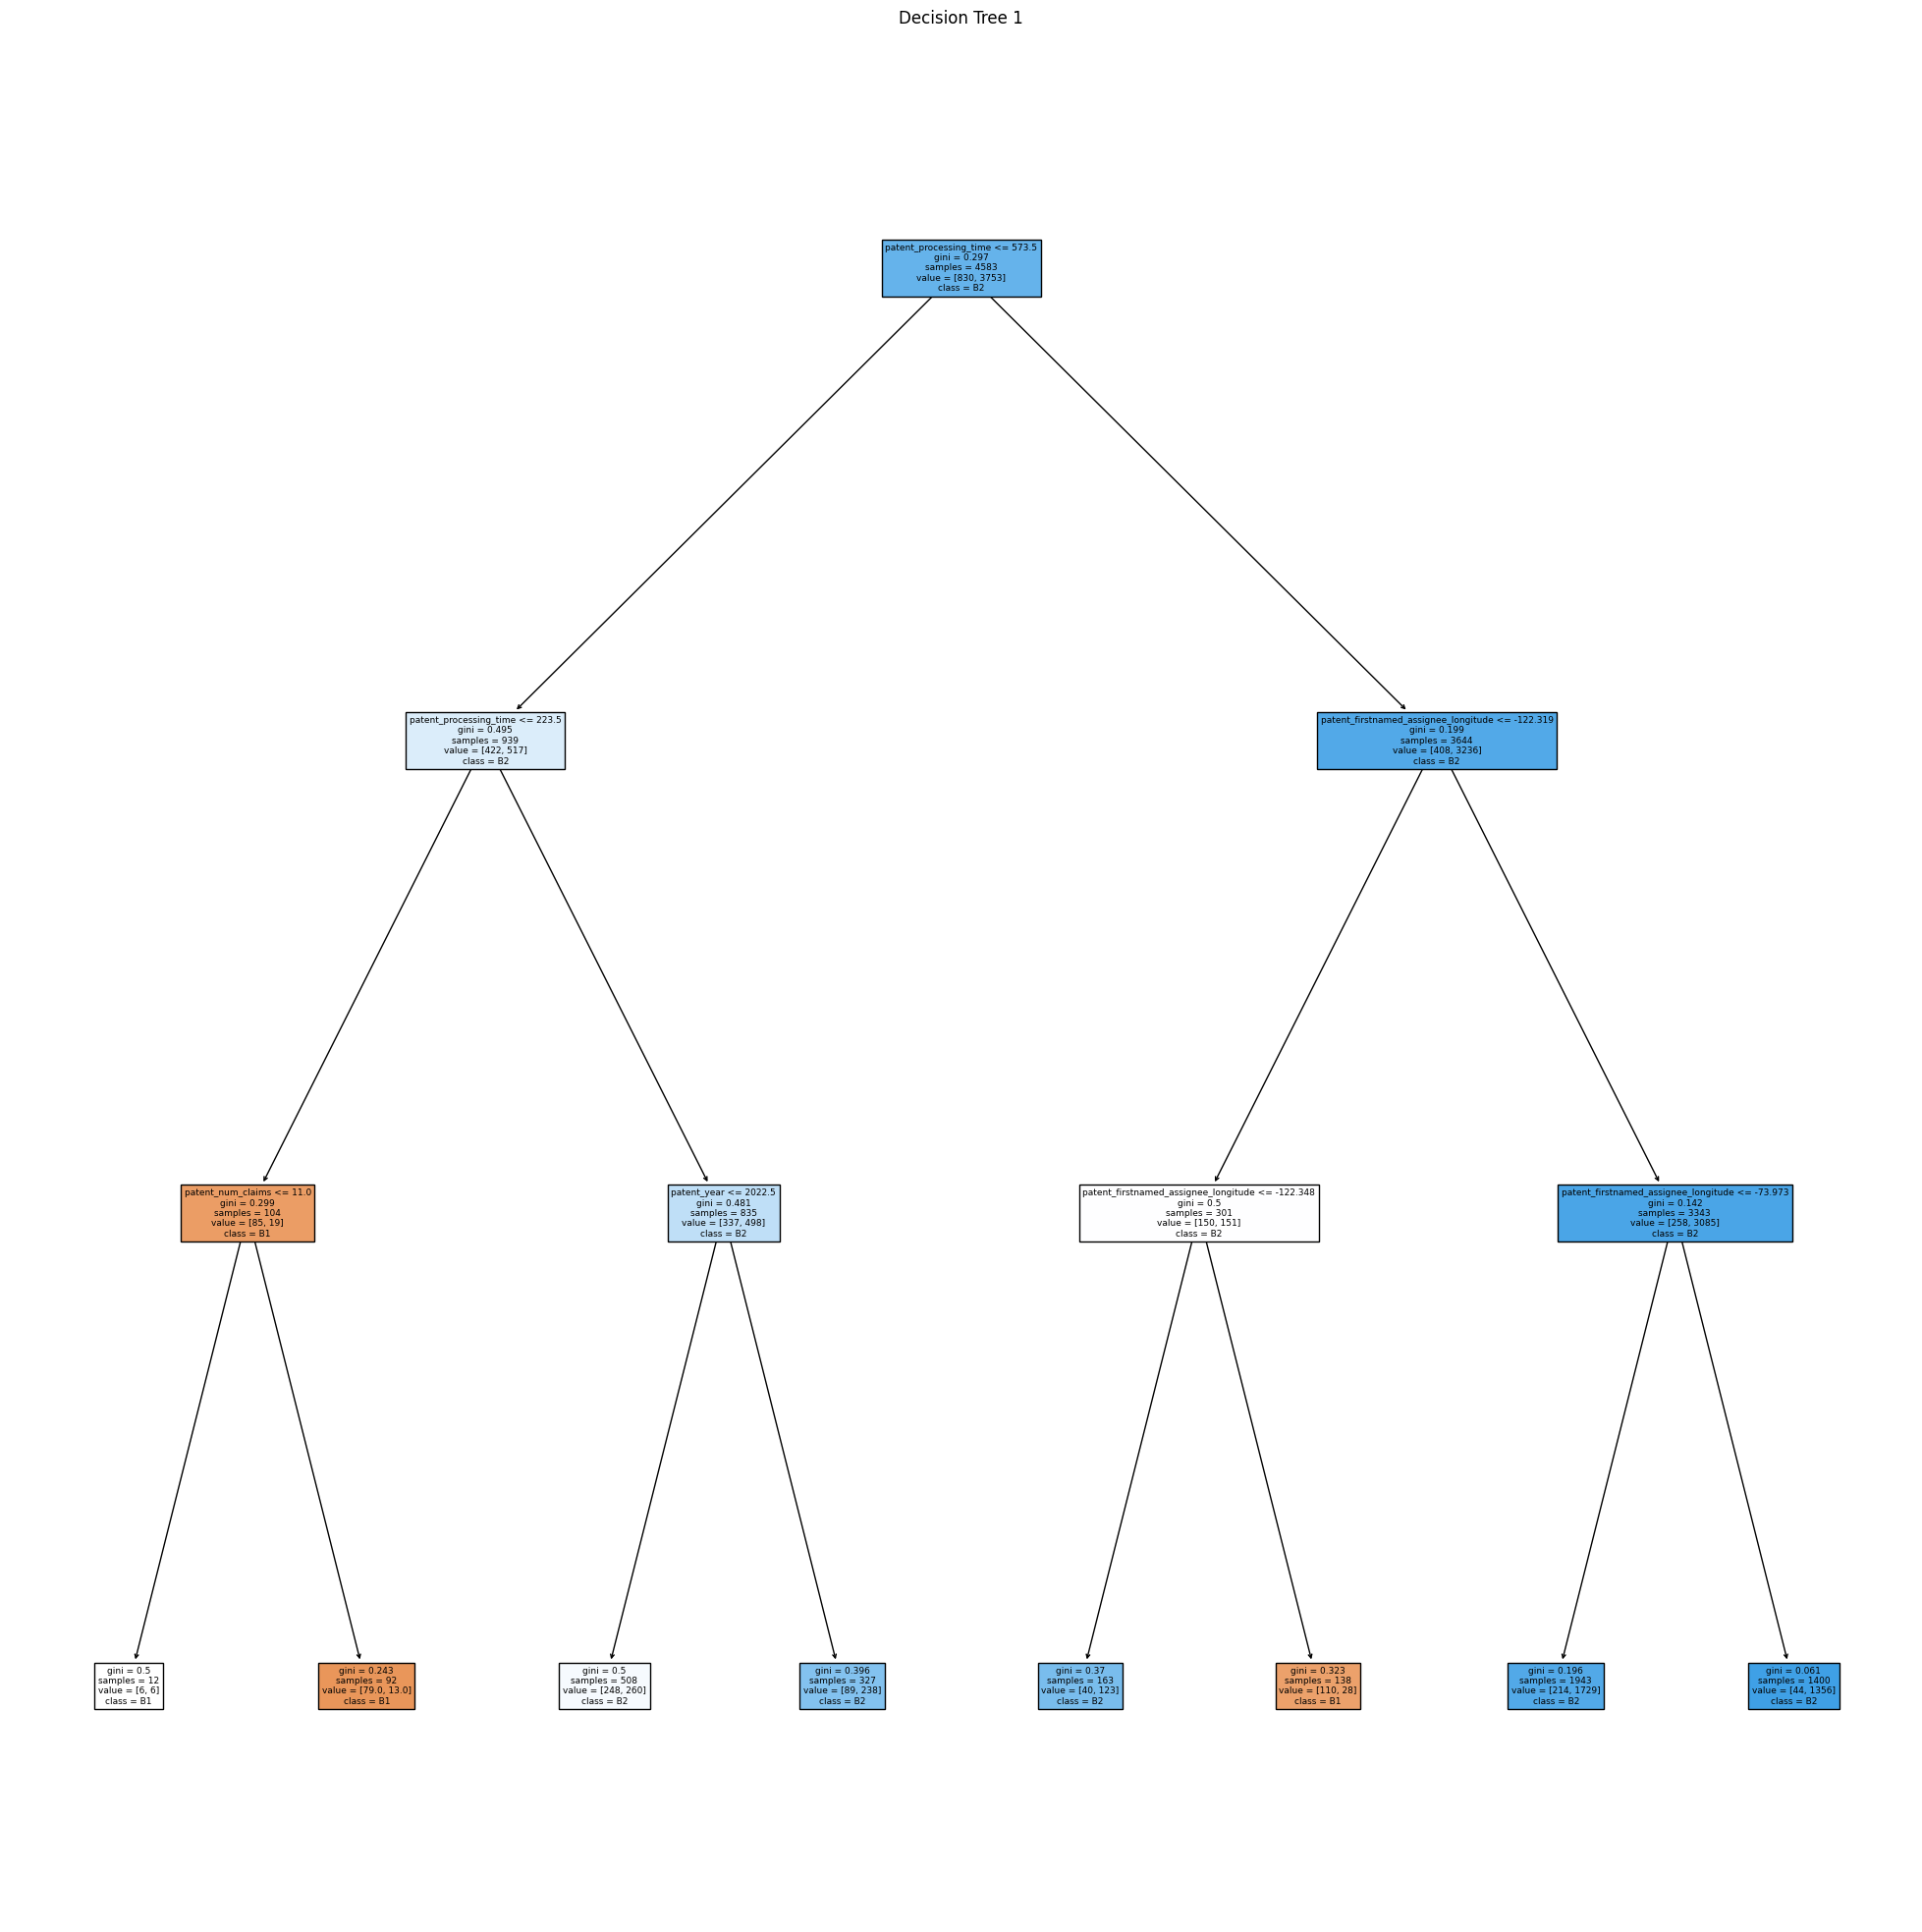

In [4]:
claims = X_train_dt['patent_num_claims'].median()
X_train_root1 = X_train_dt[X_train_dt['patent_num_claims'] <= claims]
y_train_root1 = y_train_dt[X_train_dt['patent_num_claims'] <= claims]
X_test_root1 = X_test_dt[X_test_dt['patent_num_claims'] <= claims]
y_test_root1 = y_test_dt[X_test_dt['patent_num_claims'] <= claims]

dt_model_root1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=95)
dt_model_root1.fit(X_train_root1, y_train_root1)
y_pred_root1 = dt_model_root1.predict(X_test_root1)

fig, ax = plt.subplots(figsize=(25,25))
plot_tree(dt_model_root1, feature_names=X_train_dt.columns, class_names=['B1', 'B2'], filled=True, ax=ax)
ax.set_title('Decision Tree 1')
plt.show()

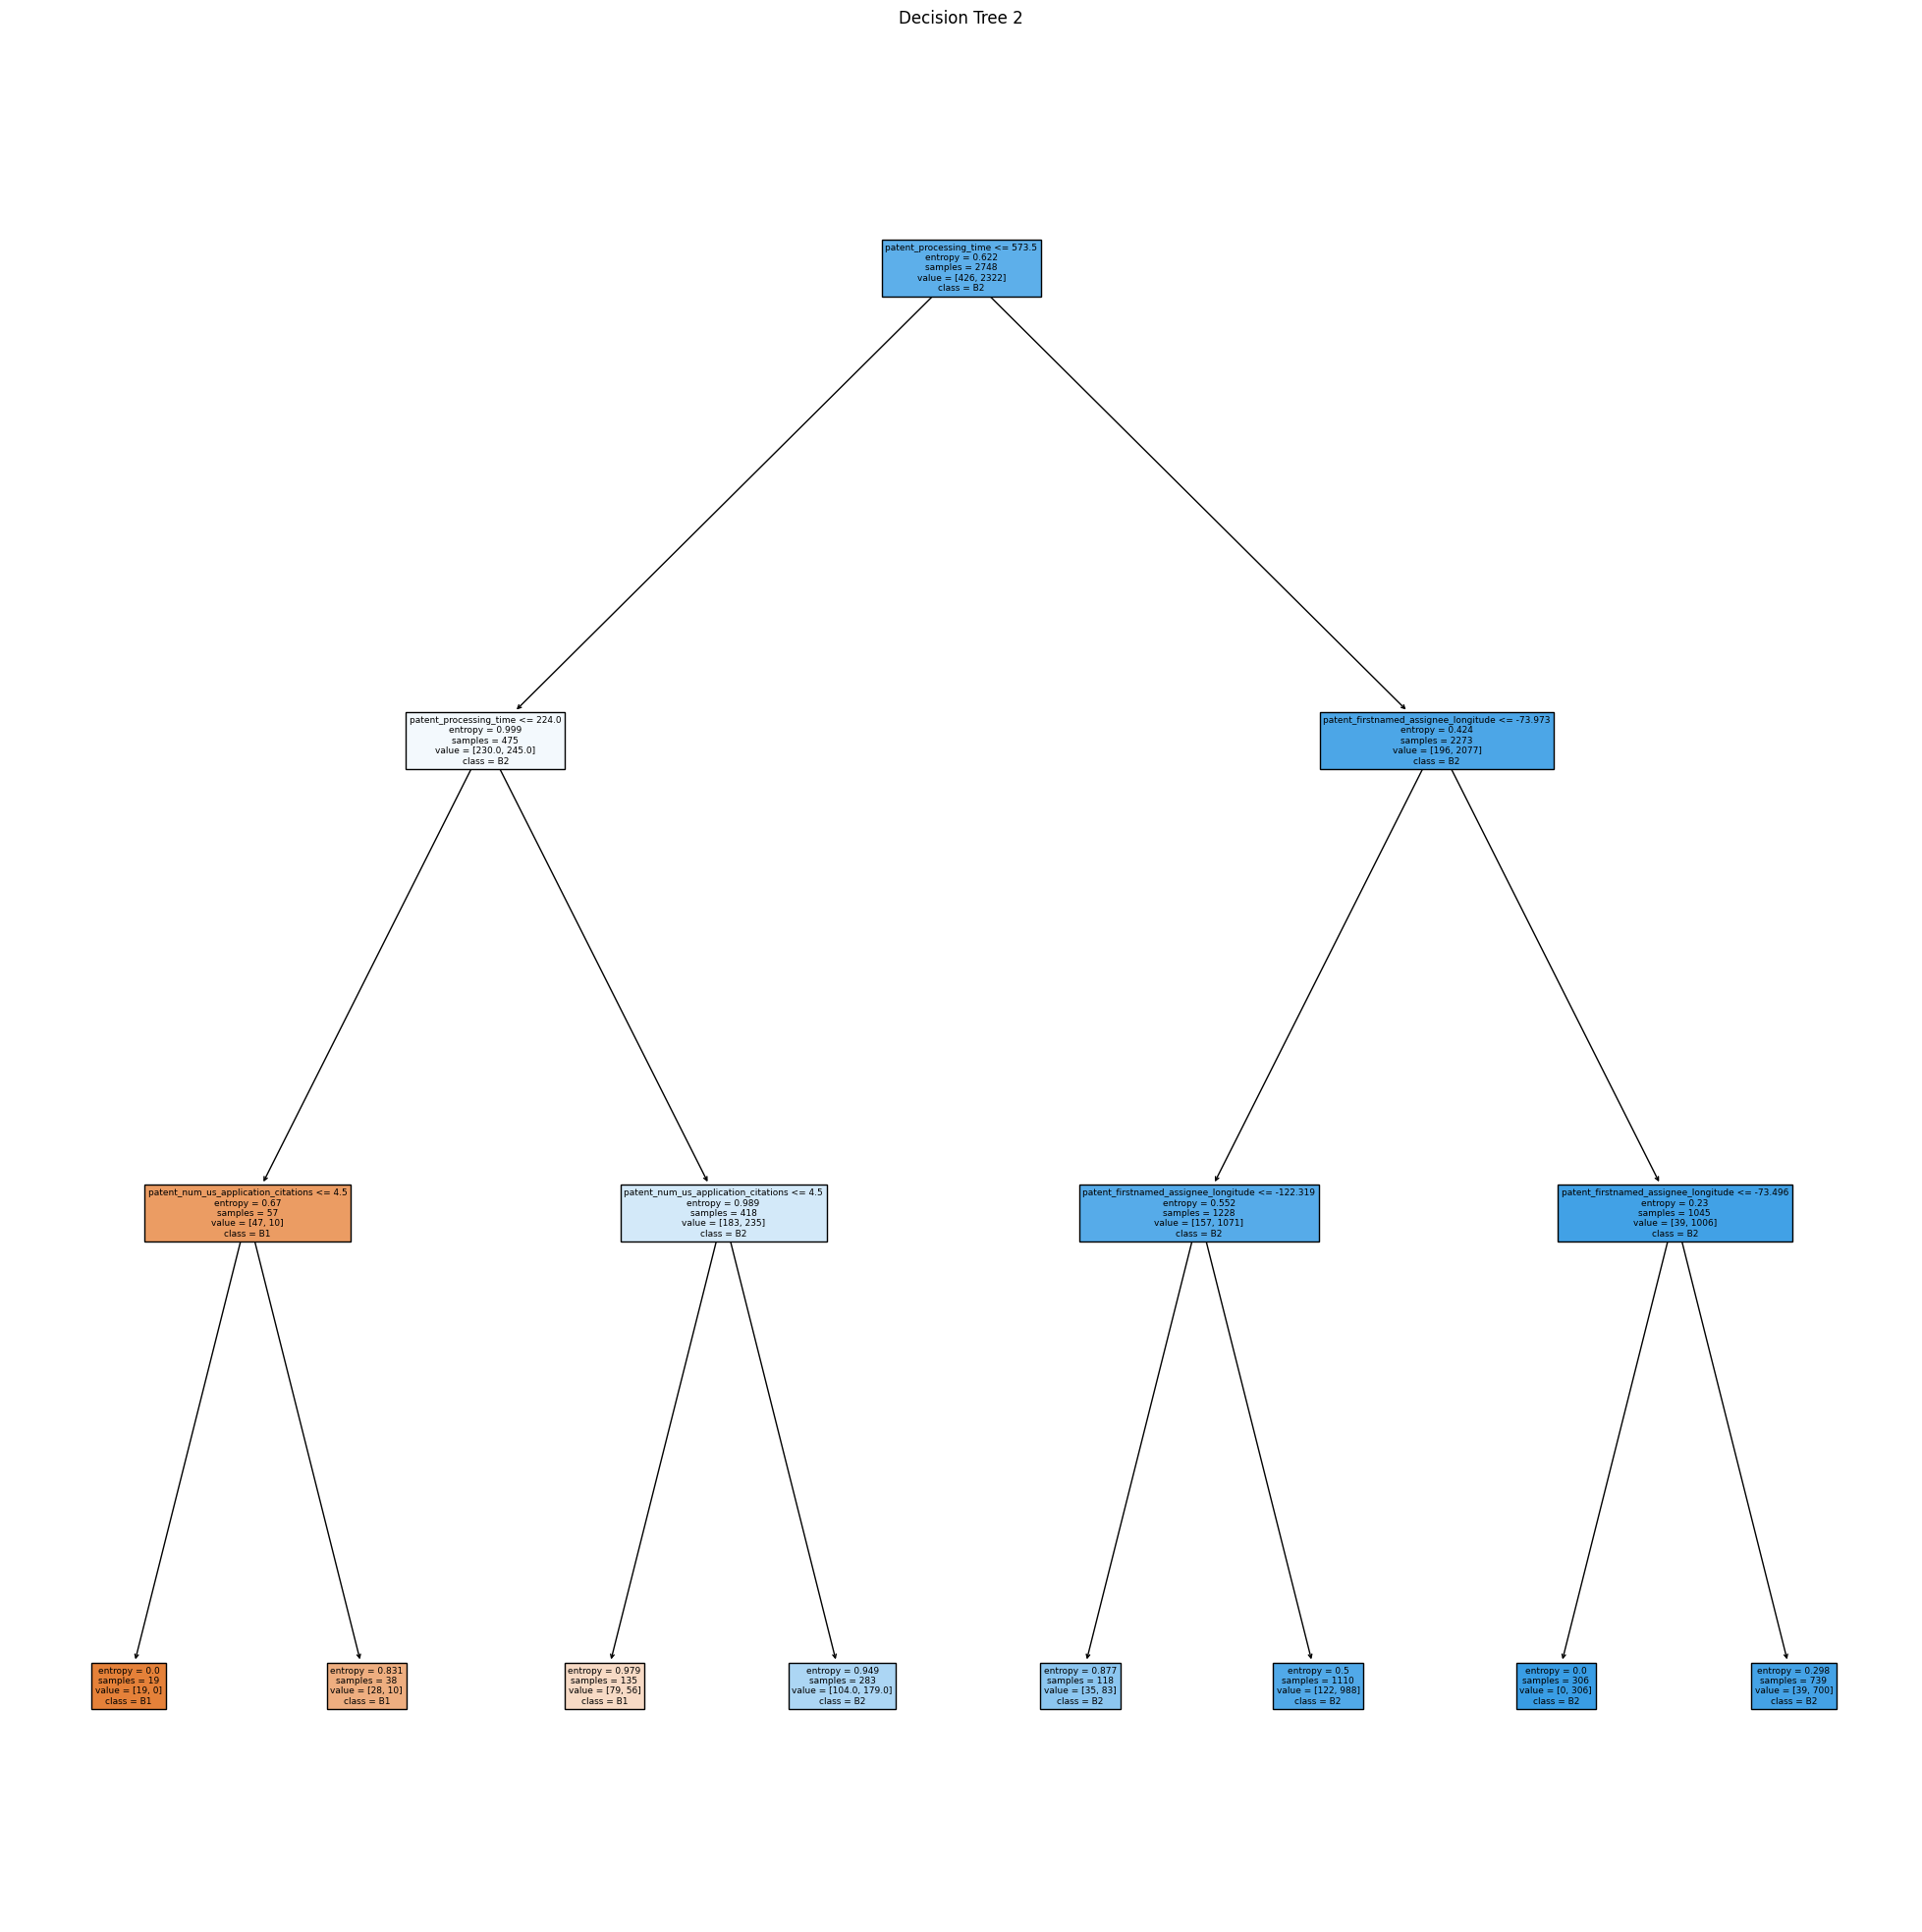

In [5]:
desc = X_train_dt['detail_desc_length'].median()
X_train_root2 = X_train_dt[X_train_dt['detail_desc_length'] <= desc]
y_train_root2 = y_train_dt[X_train_dt['detail_desc_length'] <= desc]
X_test_root2 = X_test_dt[X_test_dt['detail_desc_length'] <= desc]
y_test_root2 = y_test_dt[X_test_dt['detail_desc_length'] <= desc]

dt_model_root2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=95)
dt_model_root2.fit(X_train_root2, y_train_root2)
y_pred_root2 = dt_model_root2.predict(X_test_root2)

fig, ax = plt.subplots(figsize=(25,25))
plot_tree(dt_model_root2, feature_names=X_train_dt.columns, class_names=['B1', 'B2'], filled=True, ax=ax)
ax.set_title('Decision Tree 2')

plt.show()

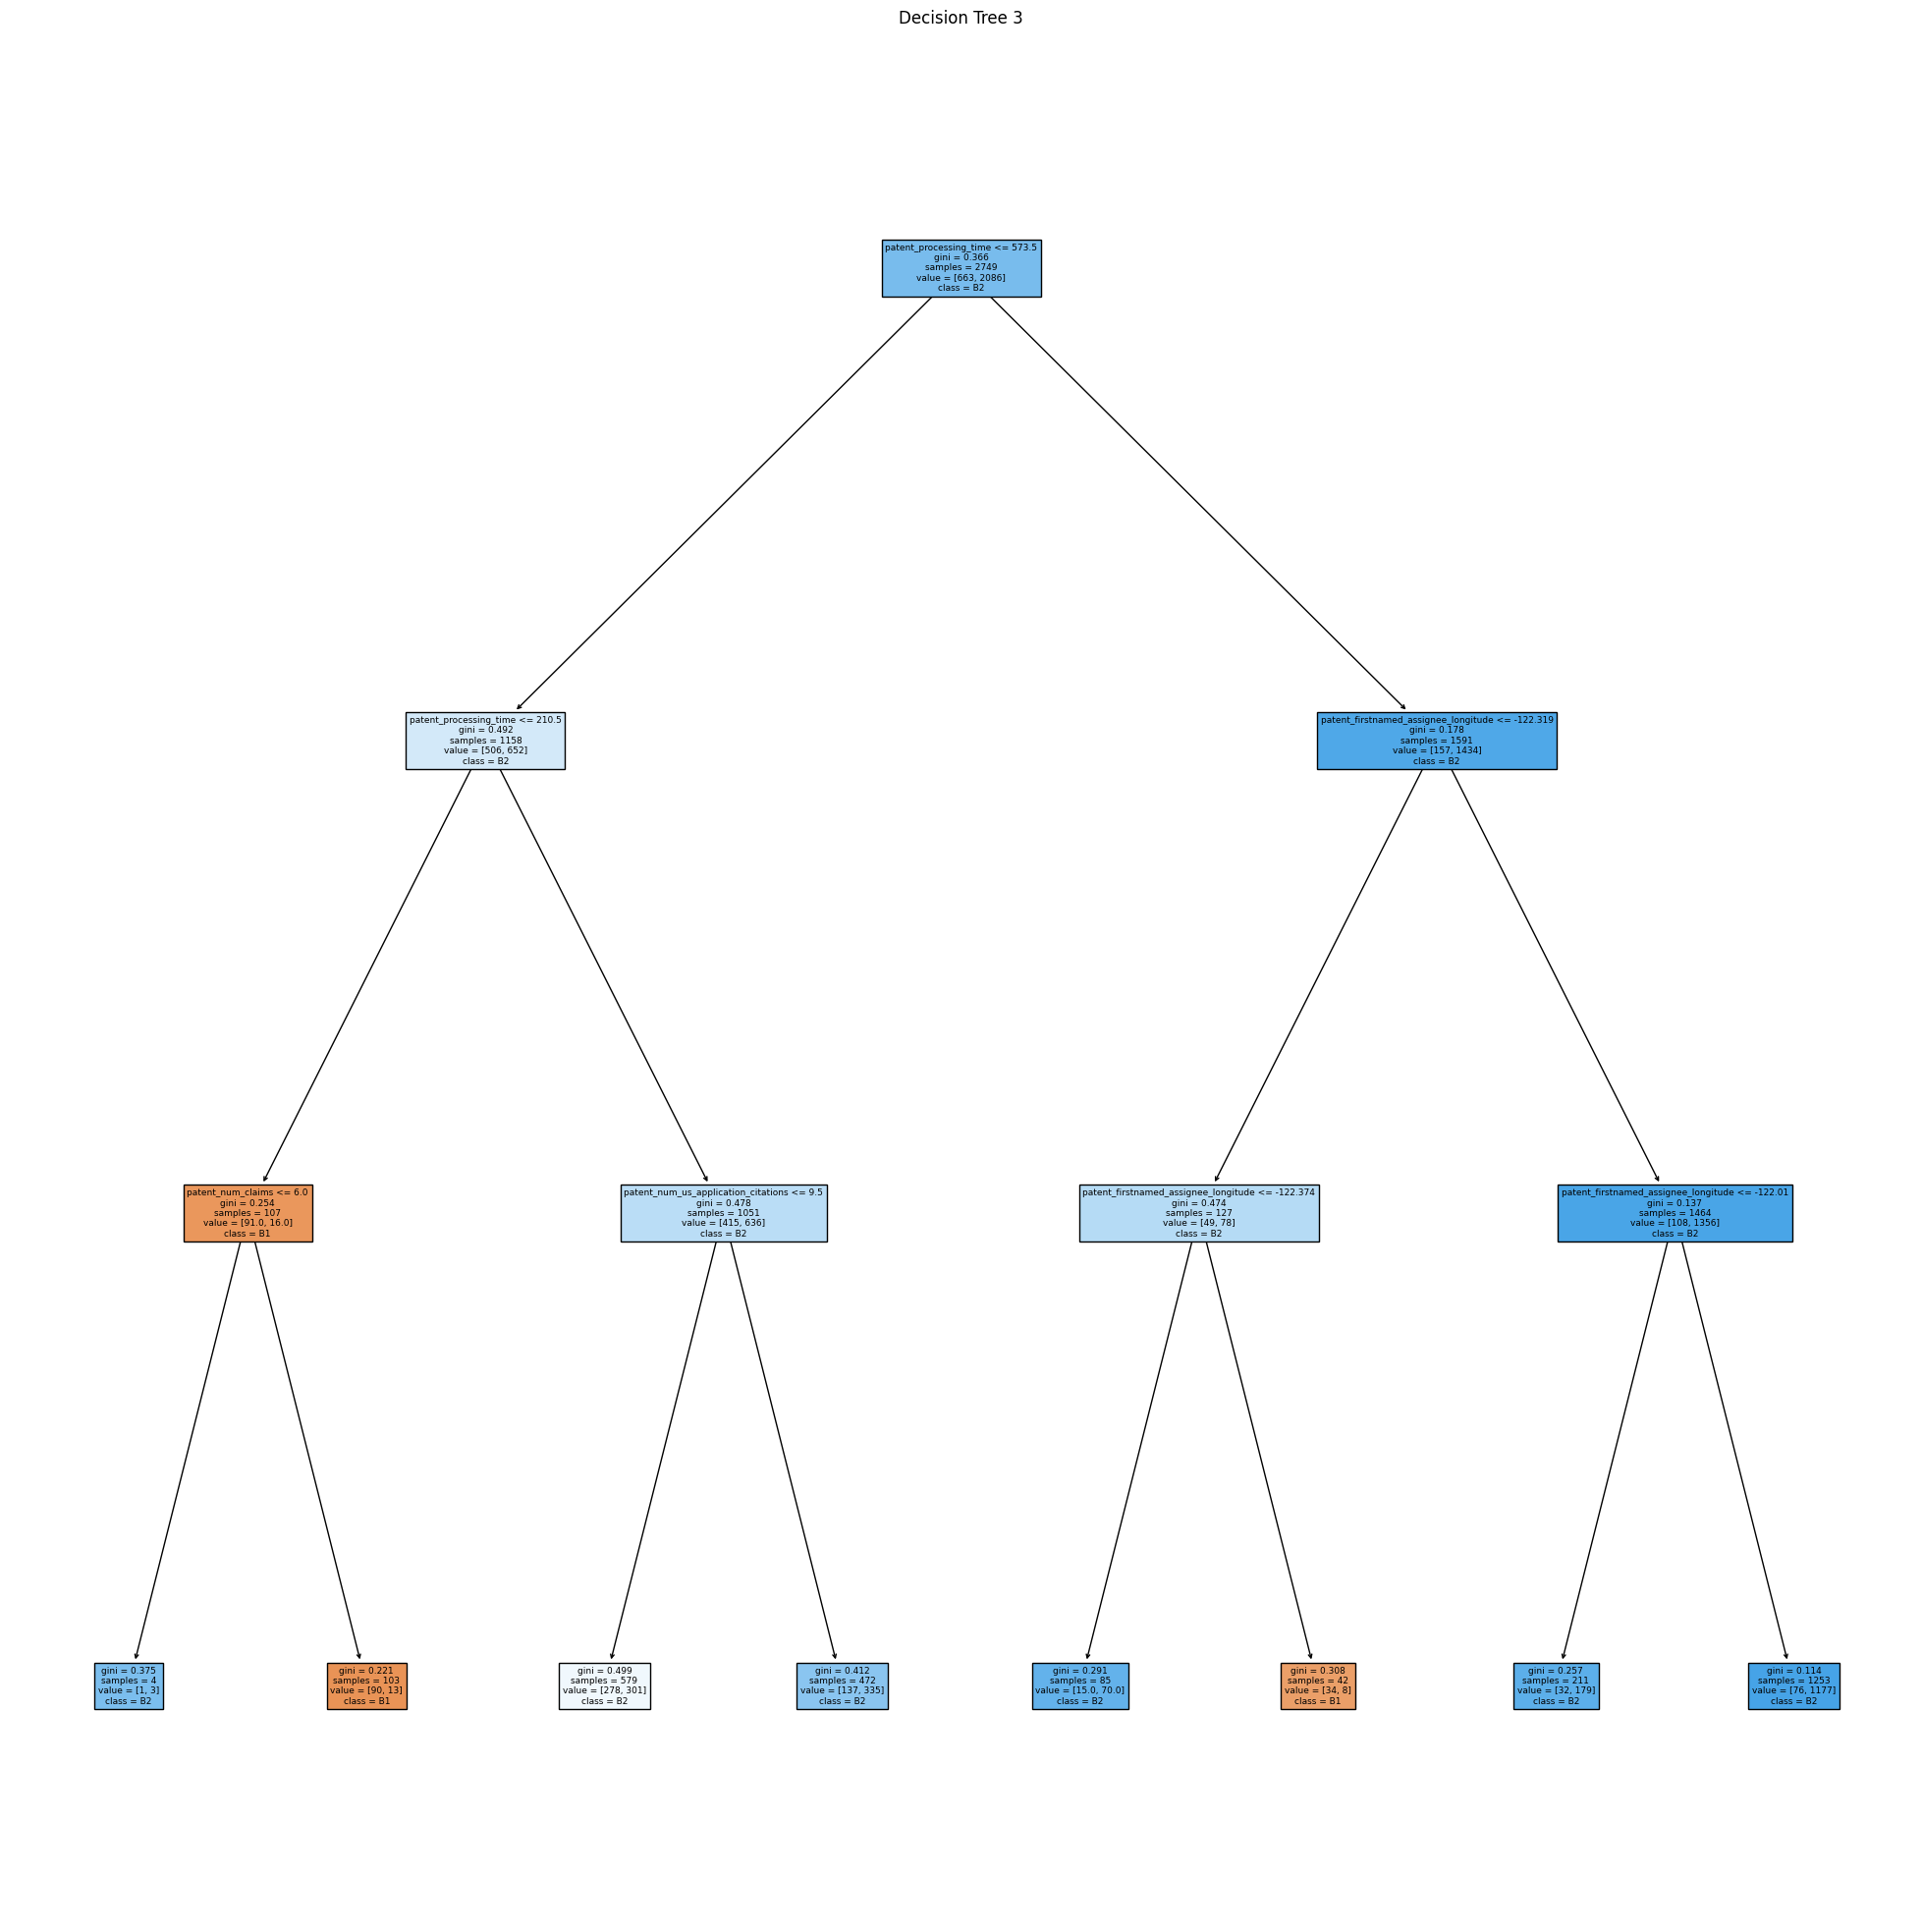

In [8]:
time = X_train_dt['patent_processing_time'].median()
X_train_root3 = X_train_dt[X_train_dt['patent_processing_time'] <= time]
y_train_root3 = y_train_dt[X_train_dt['patent_processing_time'] <= time]

X_test_root3 = X_test_dt[X_test_dt['patent_processing_time'] <= time]
y_test_root3 = y_test_dt[X_test_dt['patent_processing_time'] <= time]

dt_model_root3 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=20, random_state=95)
dt_model_root3.fit(X_train_root3, y_train_root3)
y_pred_root3 = dt_model_root3.predict(X_test_root3)

fig, ax = plt.subplots(figsize=(25,25))
plot_tree(dt_model_root3, feature_names=X_train_dt.columns, class_names=['B1', 'B2'], filled=True, ax=ax)
ax.set_title('Decision Tree 3')

plt.show()

In [9]:
acc_root1 = accuracy_score(y_test_root1, y_pred_root1)
acc_root2 = accuracy_score(y_test_root2, y_pred_root2)
acc_root3 = accuracy_score(y_test_root3, y_pred_root3)

acc_root1, acc_root2, acc_root3

(0.8307560137457045, 0.8391608391608392, 0.7540983606557377)